In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# BIKES

In [22]:
day = pd.read_csv("data/day.csv")

In [2]:
data = day.drop(["dteday", "instant", "casual", 'registered', 'cnt', 'yr'], axis=1)

In [3]:
data.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed'],
      dtype='object')

In [4]:
data_raw = data.copy()

In [5]:
data.season = data.season.map({1: "spring", 2: "summer", 3: "fall", 4: 'winter'})
data.weathersit = data.weathersit.map({1: "clear, partly cloudy", 2: 'mist, cloudy', 3: 'light snow, light rain', 4:'heavy rain, snow and fog'})
data.mnth = pd.to_datetime(data.mnth, format="%m").dt.strftime("%b")
data.weekday = pd.to_datetime(data.weekday, format="%w").dt.strftime("%a")

In [6]:
data_dummies = pd.get_dummies(data, columns=['season', 'mnth', 'weekday', 'weathersit'])

In [20]:
data_dummies.head()

,holiday,workingday,temp,atemp,hum,windspeed,season_fall,season_spring,season_summer,season_winter,...,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,weekday_Mon,"weathersit_clear, partly cloudy","weathersit_light snow, light rain","weathersit_mist, cloudy",cnt
0,0,0,0.344167,0.363625,0.805833,0.160446,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,985
1,0,0,0.363478,0.353739,0.696087,0.248539,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,801
2,0,1,0.196364,0.189405,0.437273,0.248309,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1349
3,0,1,0.200000,0.212122,0.590435,0.160296,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1562
4,0,1,0.226957,0.229270,0.436957,0.186900,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1600


In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_raw.values, day.cnt.values, random_state=0)

/home/andy/checkout/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV().fit(X_train, y_train)

In [10]:
from sklearn.metrics import r2_score

In [11]:
ridge.score(X_train, y_train)

0.52947089808569869

In [12]:
ridge.score(X_test, y_test)

0.51677323867022462

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree = DecisionTreeRegressor(max_depth=5).fit(X_train, y_train)
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.668775389005
0.516835225432


In [15]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500).fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.947307995615
0.595926183484


In [19]:
data_raw.cnt = day.cnt
data_dummies.cnt = day.cnt

data_raw.to_csv("data/bike_day_raw.csv", index=None)
data_dummies.to_csv("data/bike_day_dummies.csv", index=None)

# LOANS

In [6]:
data = pd.read_csv("data/loan.csv")[::23]

/home/andy/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
data.shape

(38582, 74)

In [8]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,1069700,1304810,10000.0,10000.0,10000.0,36 months,11.71,330.76,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,1069465,1304521,5000.0,5000.0,5000.0,36 months,8.90,158.77,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,1069073,1303718,15000.0,15000.0,15000.0,36 months,14.65,517.42,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,1065674,1299785,8200.0,8200.0,8200.0,60 months,19.42,214.62,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
counts = data.notnull().sum(axis=0).sort_values(ascending=False)

In [10]:
columns = counts[:52].index

In [11]:
data = data[columns]

In [12]:
data = data.dropna()

In [13]:
data.head()

,out_prncp,total_rec_late_fee,total_rec_prncp,total_pymnt_inv,total_pymnt,out_prncp_inv,initial_list_status,revol_bal,dti,addr_state,...,pub_rec,open_acc,title,collections_12_mths_ex_med,revol_util,last_pymnt_d,emp_title,total_rev_hi_lim,tot_cur_bal,tot_coll_amt
42550,4145.19,15.0,3854.81,4990.03,4990.030000,4145.19,f,7203.0,15.75,CO,...,1.0,9.0,My Life Saving Loan :),0.0,34.6,Oct-2015,PARTS MANAGER,20800.0,15949.0,0.0
42573,0.00,0.0,16000.00,16900.62,16900.617682,0.00,w,6868.0,7.39,MA,...,0.0,12.0,Debt Consolidation,0.0,10.3,Nov-2014,Senior Software Engineer,66800.0,369614.0,0.0
42596,13859.72,0.0,6140.28,11734.08,11734.080000,13859.72,w,13772.0,17.03,TX,...,0.0,14.0,Credit card refinancing,0.0,41.6,Jan-2016,Project Manager,33100.0,75993.0,3712.0
42619,0.00,0.0,4631.49,12732.64,12732.640000,0.00,w,27597.0,8.58,NY,...,3.0,19.0,Consolidation for Self-Publication,0.0,69.9,May-2015,Administrator,39500.0,181757.0,0.0
42642,0.00,0.0,30000.00,34218.71,34218.711966,0.00,f,17756.0,9.41,MN,...,0.0,12.0,Credit card refinancing,0.0,61.0,Mar-2015,Engineer/Conductor,29100.0,161166.0,0.0


In [14]:
bad_statuses = ["Charged Off ", "Default", "Does not meet the credit policy. Status:Charged Off", "In Grace Period",
                "Default Receiver", "Late (16-30 days)", "Late (31-120 days)"]

In [15]:

data['bad_status'] = data.loan_status.isin(bad_statuses)

In [16]:
data = data.drop(["url", "title", "id", "emp_title", "loan_status"], axis=1)

In [17]:
data.columns

Index(['out_prncp', 'total_rec_late_fee', 'total_rec_prncp', 'total_pymnt_inv',
       'total_pymnt', 'out_prncp_inv', 'initial_list_status', 'revol_bal',
       'dti', 'addr_state', 'zip_code', 'purpose', 'pymnt_plan', 'issue_d',
       'verification_status', 'annual_inc', 'home_ownership', 'emp_length',
       'sub_grade', 'grade', 'installment', 'int_rate', 'term',
       'funded_amnt_inv', 'funded_amnt', 'loan_amnt', 'member_id',
       'total_rec_int', 'recoveries', 'last_pymnt_amnt',
       'collection_recovery_fee', 'application_type', 'policy_code',
       'inq_last_6mths', 'acc_now_delinq', 'last_credit_pull_d', 'total_acc',
       'delinq_2yrs', 'earliest_cr_line', 'pub_rec', 'open_acc',
       'collections_12_mths_ex_med', 'revol_util', 'last_pymnt_d',
       'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt', 'bad_status'],
      dtype='object')

In [18]:
data.dtypes

out_prncp                     float64
total_rec_late_fee            float64
total_rec_prncp               float64
total_pymnt_inv               float64
total_pymnt                   float64
out_prncp_inv                 float64
initial_list_status            object
revol_bal                     float64
dti                           float64
addr_state                     object
zip_code                       object
purpose                        object
pymnt_plan                     object
issue_d                        object
verification_status            object
annual_inc                    float64
home_ownership                 object
emp_length                     object
sub_grade                      object
grade                          object
installment                   float64
int_rate                      float64
term                           object
funded_amnt_inv               float64
funded_amnt                   float64
loan_amnt                     float64
member_id   

In [70]:
data.purpose.value_counts()

debt_consolidation    489197
credit_card           195527
home_improvement       46956
other                  36707
major_purchase         14143
medical                 7457
small_business          7451
car                     6666
moving                  4549
vacation                4140
house                   3001
wedding                  876
renewable_energy         432
educational                1
Name: purpose, dtype: int64

In [37]:
float_columns = data.dtypes[data.dtypes == "float64"].index

In [38]:
data_float = data[float_columns]

In [39]:
data_float.shape

(32719, 30)

In [40]:
X = data_float.values
y = data.bad_status.values

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.972329760789
0.975794621027


In [69]:
lr.coef_.shape

(1, 28)

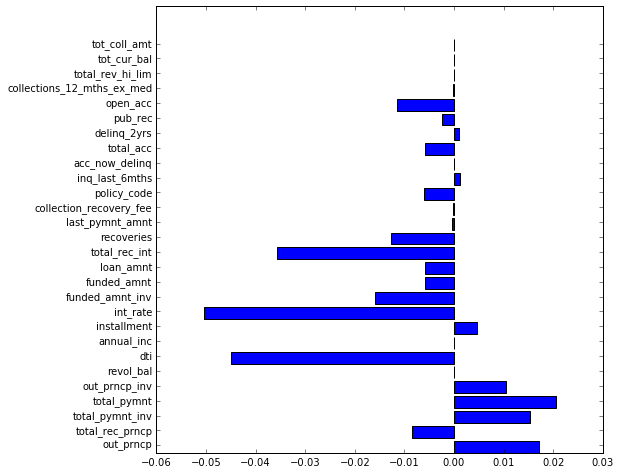

In [71]:
plt.figure(figsize=(8, 8))
plt.barh(range(X.shape[1]), lr.coef_.ravel())
plt.yticks(np.arange(X.shape[1]) + .5, data_float_hard.columns.tolist(), va="center");

In [72]:
data_float_hard = data_float.drop(['total_rec_late_fee', "revol_util"], axis=1)

In [67]:
X = data_float_hard.values

# SHELTER ANIMALS

In [114]:
train = pd.read_csv("data/shelter_train.csv")
test = pd.read_csv("data/shelter_test.csv")

In [115]:
train.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


# Bank marketing

In [116]:
data = pd.read_csv("data/bank-additional/bank-additional-full.csv", sep=";")

In [117]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
data.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [119]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [120]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [121]:
target = data.y
data = data.drop("y", axis=1)
bla = pd.get_dummies(data)

In [122]:
bla.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [123]:
X = bla.values
y = target.values

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

0.908905506458
0.91201320773


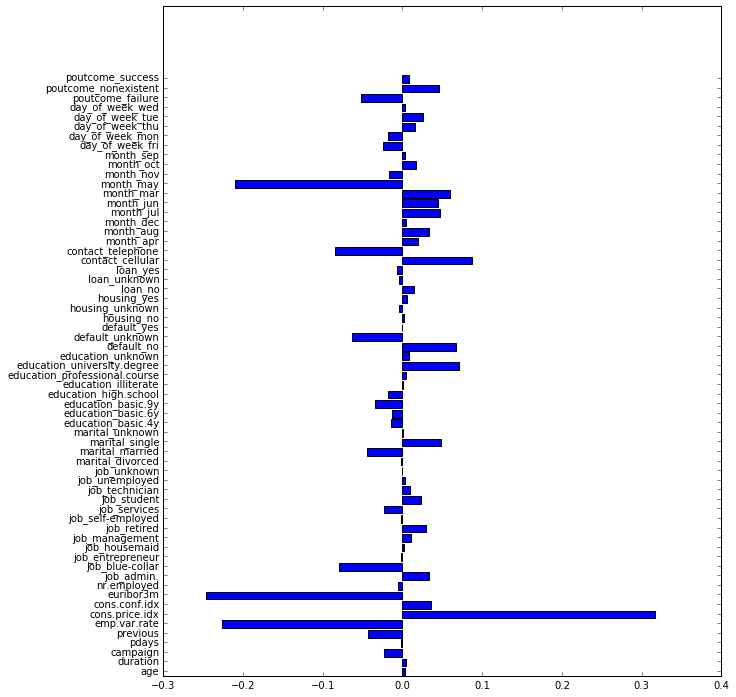

In [130]:
plt.figure(figsize=(10, 12))
plt.barh(range(X.shape[1]), lr.coef_.ravel())
plt.yticks(np.arange(X.shape[1]) + .5, bla.columns.tolist(), va="center");

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rf.score(X_train, y_train)

0.99993525622349555

In [132]:
rf.score(X_test, y_test)

0.91317859570748761

In [135]:
bla['target'] = target
bla.to_csv("data/bank-campaign.csv", index=None)